In [1]:
# include necessary packages
using Revise

push!(LOAD_PATH,".")
#using PolicyViz
using HDF5

In [3]:
include("PolicyViz.jl");

## Visualize Regressed VerticalCAS Policies
#### Inputs: 
* **Q**: Q-values from Discrete Value Iteration

#### Outputs: Interactive Plots

##### Interactive Settings:
* **nbin**: The number of bins being plotted. Higher nbin means better resolution, but that takes longer to compute
* **savePlot**: This option and the remaining options are used to format and generate .tex files of the plots. Set to true if you want to save the plot, but as a result the plots shown here will no longer continue to update. The switch can be toggled to true whenever you have a plot you want to save.
* **xmin**: Minimum of x-axis
* **xmax**: Maximum of x-axis
* **ymin**: Minimum of y-axis
* **ymax**: Maximum of y-axis
* **dh0**: Ownship vertical rate (ft/s)
* **dh1**: Intruder vertical rate (ft/s)
* **pra**: Previous RA

In [4]:
# Read Q-values
Q = h5read("/scratch/smkatz/test.h5","q")';

(div
  Widgets.Widget{:spinbox}(DataStructures.OrderedDict{Symbol,Any}(:changes=>Observables.Observable{Int64}("ob_02", 0, Any[WebIO.SyncCallback(WebIO.Scope("knockout-component-fd03d36c-9ad5-4400-9ecd-a08cbab4d52e", WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["nbin"], Dict{Symbol,Any}(Pair{Symbol,Any}(:className, "interact "),Pair{Symbol,Any}(:style, Dict{Any,Any}(Pair{Any,Any}(:padding, "5px 10px 0px 10px")))), 1)], Dict{Symbol,Any}(Pair{Symbol,Any}(:attributes, Dict("style"=>"text-align:right;width:18%"))), 2), WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol,Any}(Pair{Symbol,Any}(:attributes, Dict{Any,Any}(Pair{Any,Any}(:type, "number"),Pair{Any,Any}(Symbol("data-bind"), "numericValue: value, valueUpdate: 'input', event: {change : function () {this.changes(this.changes()+1)}}"))),Pair{Symbol,Any}(:placeholder, ""),Pair{Symbol,Any}(:className, "input "),Pair{Symbol,Any}(:style, Dict{Any,Any}())), 0)], Dict{Symbol,Any}(Pair{Symbol,Any}(:attributes, Dict("style"=>"flex-grow:1; margin: 0 2%"))), 1), WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[], Dict{Symbol,Any}(), 0)], Dict{Symbol,Any}(Pair{Symbol,Any}(:attributes, Dict("style"=>"width:18%"))), 1)], Dict{Symbol,Any}(Pair{Symbol,Any}(:attributes, Dict("style"=>"display:flex; justify-content:center; align-items:center;"))), 7), Dict{String,Tuple{Observables.Observable,Union{Bool, Void}}}(Pair{String,Tuple{Observables.Observable,Union{Bool, Void}}}("changes", (Observables.Observable{Int64}(#= circular reference @-7 =#), nothing)),Pair{String,Tuple{Observables.Observable,Union{Bool, Void}}}("value", (Observables.Observable{Union{Float64, Void}}("ob_01", 100.0, Any[WebIO.SyncCallback(WebIO.Scope(#= circular reference @-7 =#), WebIO.SyncCallback(WebIO.Scope(#= circular reference @-8 =#), WebIO.#37)), Observables.g]), nothing))), Set{String}(), nothing, Any["knockout"=>"/home/smkatz/.julia/v0.6/Knockout/src/../assets/knockout.js", "knockout_punches"=>"/home/smkatz/.julia/v0.6/Knockout/src/../assets/knockout_punches.js", "/home/smkatz/.julia/v0.6/InteractBase/src/../assets/all.js", "/home/smkatz/.julia/v0.6/InteractBase/src/../assets/style.css", "/home/smkatz/.julia/v0.6/InteractBulma/src/../assets/main.css"], Dict{Any,Any}(Pair{Any,Any}("_promises", Dict{Any,Any}(Pair{Any,Any}("importsLoaded", Any[WebIO.JSString("function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init : function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            })\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            })\n            ko.applyBindingsToNode(element, { value: stringified, valueUpdate: allBindings.get('valueUpdate')}, context);\n        }\n    };\n    var json_data = JSON.parse(\"{\\\"changes\\\":0,\\\"value\\\":100.0}\");\n    var self = this;\n    function AppViewModel() {\n        for (var key in json_data) {\n            var el = json_data[key];\n            this[key] = Array.isArray(el) ? ko.observableArray(el) : ko.observable(el);\n        }\n        \n        [this[\"displayedvalue\"]=ko.computed(function (){return this.value();},this)]\n        [this[\"changes\"].subscribe((function (val){!(this.valueFromJulia[\"changes\"]) ? (Web
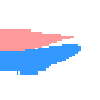
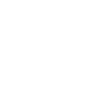
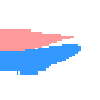
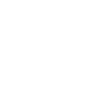

In [5]:
viz_policy(Q)